In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

df = pd.read_csv(r'HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [115]:
## This statement makes a new attribute Attrition01 which has values 0 and 1. It sets the Attrition attribute to 0 for No Attrition and 1 for Yes Attrition

df['Attrition01']=np.where(df['Attrition']=='Yes',1,0)
df.head()

## Dropping the Attrition table, its dummy is already made
Modified_df = df.drop(['Attrition'],axis=1)

In [76]:
## Getting the size of the data

df.shape  ## indicates that there are 1470 rows of data, each having 36 columns. Initial dataset had 35 columns, we added the 36th one as Attrition01

(1470, 36)

In [77]:
## Descriptive Statistics

df.groupby(['Attrition'])['Age','DailyRate','DistanceFromHome','StandardHours'].agg(['mean','std'])

Age            DailyRate             DistanceFromHome  \
                mean      std        mean         std             mean   
Attrition                                                                
No         37.561233  8.88836  812.504461  403.208379         8.915653   
Yes        33.607595  9.68935  750.362869  401.899519        10.632911   

                    StandardHours       
                std          mean  std  
Attrition                               
No         8.012633            80  0.0  
Yes        8.452525            80  0.0

In [78]:
df.groupby(['Attrition'])['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'].agg(['mean','std'])

YearsAtCompany           YearsInCurrentRole            \
                    mean       std               mean       std   
Attrition                                                         
No              7.369019  6.096298           4.484185  3.649402   
Yes             5.130802  5.949984           2.902954  3.174827   

          YearsSinceLastPromotion           YearsWithCurrManager            
                             mean       std                 mean       std  
Attrition                                                                   
No                       2.234388  3.234762             4.367397  3.594116  
Yes                      1.945148  3.153077             2.852321  3.143349

In [79]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition01
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [152]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition01
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105


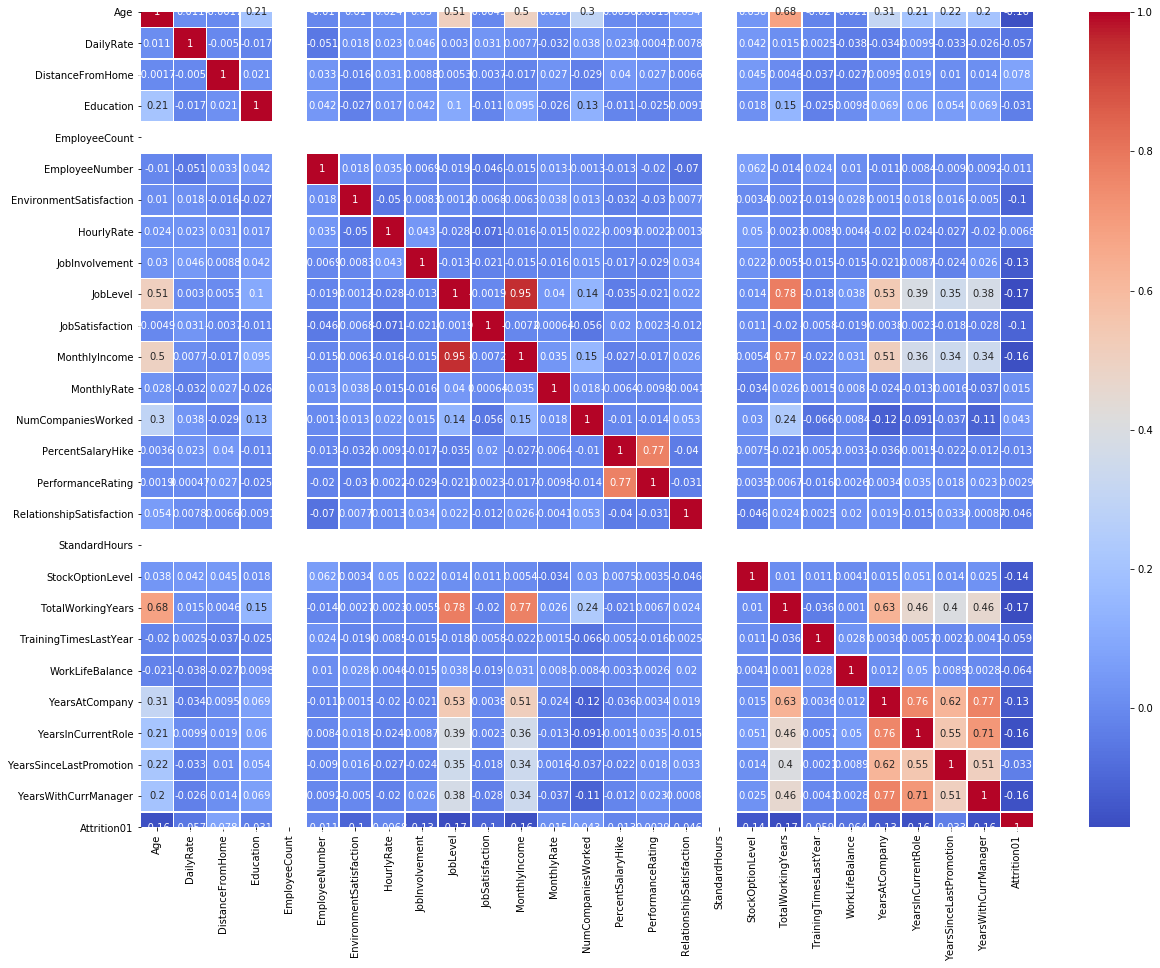

In [81]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

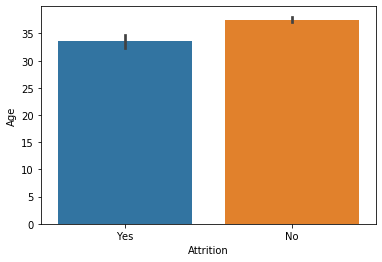

In [82]:
sns.barplot(data=df,x='Attrition',y='Age')

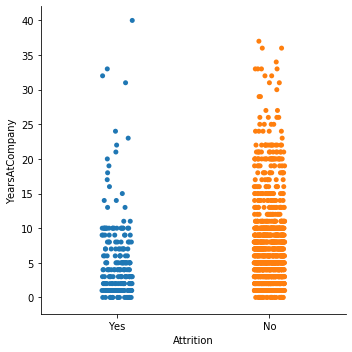

In [83]:
sns.catplot(x="Attrition", y="YearsAtCompany", data=df);

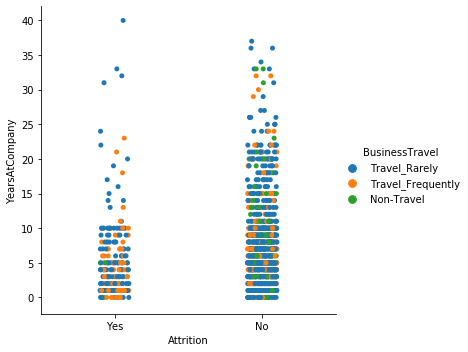

In [84]:
sns.catplot(x="Attrition", y="YearsAtCompany", hue="BusinessTravel", data=df);

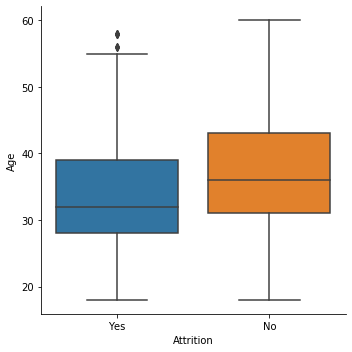

In [85]:
sns.catplot(x="Attrition", y="Age", kind="box", data=df);

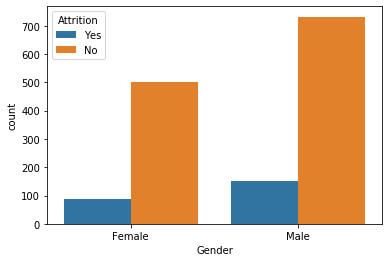

In [86]:
sns.countplot(x='Gender',hue='Attrition',data=df)

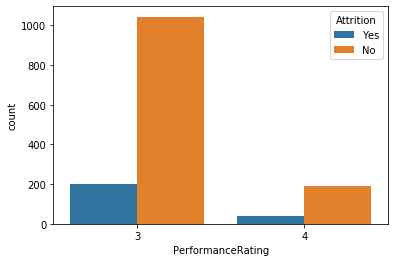

In [87]:
sns.countplot(x='PerformanceRating',hue='Attrition',data=df)

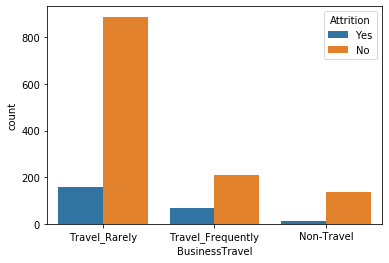

In [88]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

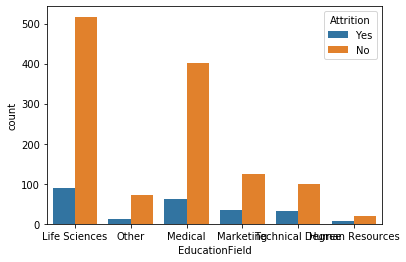

In [89]:
sns.countplot(x='EducationField',hue='Attrition',data=df)

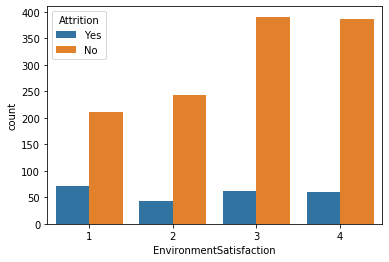

In [90]:
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df)

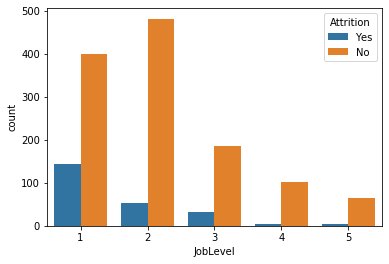

In [91]:
sns.countplot(x='JobLevel',hue='Attrition',data=df)

[Text(0, 0, 'Sales Executive'),
 Text(0, 0, 'Research Scientist'),
 Text(0, 0, 'Laboratory Technician'),
 Text(0, 0, 'Manufacturing Director'),
 Text(0, 0, 'Healthcare Representative'),
 Text(0, 0, 'Manager'),
 Text(0, 0, 'Sales Representative'),
 Text(0, 0, 'Research Director'),
 Text(0, 0, 'Human Resources')]

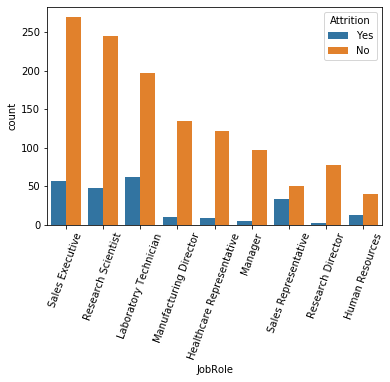

In [92]:
chart = sns.countplot(x='JobRole',hue='Attrition',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)

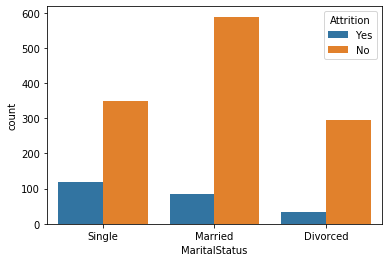

In [93]:
chart = sns.countplot(x='MaritalStatus',hue='Attrition',data=df)

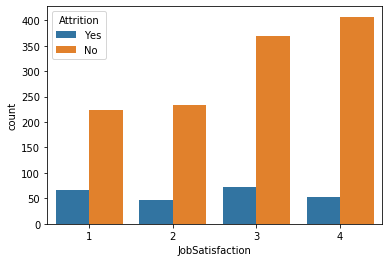

In [178]:
chart = sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BD35E5688>,
      dtype=object)

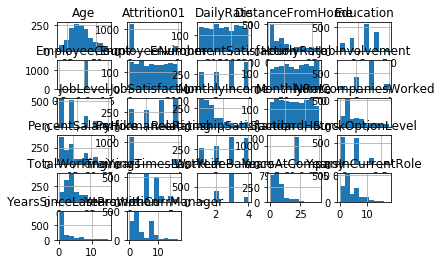

In [100]:
df.hist()

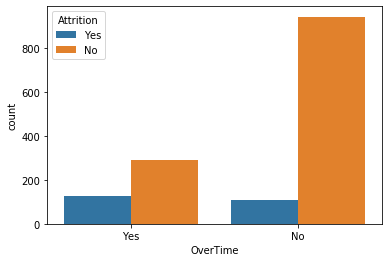

In [101]:
chart = sns.countplot(x='OverTime',hue='Attrition',data=df)

In [102]:
# Checking for missing values

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing data in the data set.

In [117]:
##Creating Dummies

## Gender Dummy
dummy = pd.get_dummies(Modified_df['Gender'], drop_first=True)
Modified_df = pd.concat([Modified_df, dummy], axis=1) 
Modified_df = Modified_df.drop(['Gender'],axis=1)


## Business Travel Dummy
dummy = pd.get_dummies(Modified_df['BusinessTravel'], drop_first=True)
Modified_df = pd.concat([Modified_df, dummy], axis=1) 
Modified_df = Modified_df.drop(['BusinessTravel'],axis=1)


## Department Dummy
dummy = pd.get_dummies(Modified_df['Department'], drop_first=True)
Modified_df = pd.concat([Modified_df, dummy], axis=1) 
Modified_df = Modified_df.drop(['Department'],axis=1)

## Education Field Dummy
dummy = pd.get_dummies(Modified_df['EducationField'], drop_first=True)
Modified_df = pd.concat([Modified_df, dummy], axis=1) 
Modified_df = Modified_df.drop(['EducationField'],axis=1)

## Job Role Dummy
dummy = pd.get_dummies(Modified_df['JobRole'], drop_first=True)
Modified_df = pd.concat([Modified_df, dummy], axis=1) 
Modified_df = Modified_df.drop(['JobRole'],axis=1)

## Marital Status Dummy
dummy = pd.get_dummies(Modified_df['MaritalStatus'], drop_first=True)
Modified_df = pd.concat([Modified_df, dummy], axis=1) 
Modified_df = Modified_df.drop(['MaritalStatus'],axis=1)


## Overtime Dummy
dummy = pd.get_dummies(Modified_df['OverTime'], drop_first=True)
Modified_df = pd.concat([Modified_df, dummy], axis=1) 
Modified_df = Modified_df.drop(['OverTime'],axis=1)



In [118]:
Modified_df.columns
Modified_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


In [119]:
Modified_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition01',
       'Male', 'Travel_Frequently', 'Travel_Rarely', 'Research & Development',
       'Sales', 'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Married', 'Single', 'Yes'],
      dtype='object')

In [121]:
Modified_df = Modified_df.rename(columns={'Yes': 'OverTime_Yes'})

In [122]:
Modified_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition01',
       'Male', 'Travel_Frequently', 'Travel_Rarely', 'Research & Development',
       'Sales', 'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Married', 'Single', 'OverTime_Yes'],
      dtype='object')

In [123]:
Modified_df = Modified_df.rename(columns={'Other': 'EdnField_Other'})

In [124]:
Modified_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition01',
       'Male', 'Travel_Frequently', 'Travel_Rarely', 'Research & Development',
       'Sales', 'Life Sciences', 'Marketing', 'Medical', 'EdnField_Other',
       'Technical Degree', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Married', 'Single', 'OverTime_Yes'],
      dtype='obje

In [125]:
## creating a dummy for Over18 (all Y here in dataset)

Modified_df['Over18_Yes']=Modified_df.Over18.map({'N':0,'Y':1})
Modified_df = Modified_df.drop(['Over18'],axis=1)

In [126]:
Modified_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,OverTime_Yes,Over18_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,1,0,0,1,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,1,0,0,1,0,0,1
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,1,0,0,1,0,1,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,0,1


In [127]:
Modified_df.to_csv('hr_attrition_modified.csv')

In [149]:
Modified_df.isnull().sum()

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition01                 0
Male                        0
Travel_Frequently           0
Travel_Rarely               0
Research & Development      0
Sales                       0
Life Sciences               0
Marketing 

In [168]:
## Logistic Regression
## Taking 33% Testing data and 66% Training data 

x = Modified_df.drop(['Attrition01','EmployeeCount','StandardHours','EmployeeNumber','Over18_Yes',], axis=1)
y = Modified_df['Attrition01']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\kimaya pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))
print("Accuracy: ", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       401
           1       0.83      0.28      0.42        85

    accuracy                           0.86       486
   macro avg       0.85      0.63      0.67       486
weighted avg       0.86      0.86      0.84       486

Confusion Matrix
[[396   5]
 [ 61  24]]
Accuracy:  0.8641975308641975


In [170]:
print(x_test.shape)

(486, 44)


In [171]:
print(x_train.shape)

(984, 44)


In [172]:
## Logistic Regression
# Considering 80%-20% 

x = Modified_df.drop(['Attrition01','EmployeeCount','StandardHours','EmployeeNumber','Over18_Yes',], axis=1)
y = Modified_df['Attrition01']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = LogisticRegression()
result = model.fit(x_train, y_train)

print("X_Test Size: ", x_test.shape)
print("X_Train Size: ", x_train.shape)

predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))
print("Accuracy: ", accuracy_score(y_test, predictions))

X_Test Size:  (294, 44)
X_Train Size:  (1176, 44)
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       236
           1       0.80      0.14      0.24        58

    accuracy                           0.82       294
   macro avg       0.81      0.56      0.57       294
weighted avg       0.82      0.82      0.77       294

Confusion Matrix
[[234   2]
 [ 50   8]]
Accuracy:  0.8231292517006803


C:\Users\kimaya pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The model shows accuracy of 82.31%. We now plot the ROC curve

0.5647282291057861


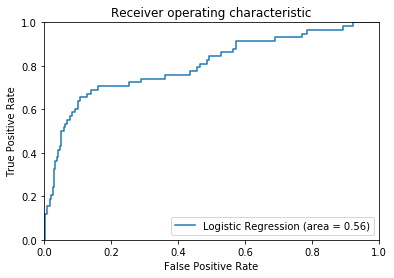

In [173]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [174]:
model.intercept_

array([0.0897561])

In [175]:
model.coef_

array([[-1.74066294e-02, -1.91718498e-04,  4.44349642e-02,
         1.54173700e-01, -2.37339019e-01,  9.11095124e-03,
        -2.45368225e-01, -3.25342517e-02, -1.56780360e-01,
        -9.39532169e-05,  1.25586956e-05,  1.22544007e-01,
        -1.42317509e-02,  1.80456673e-01, -3.69934874e-02,
        -3.63487458e-01, -3.40051473e-02, -6.76159439e-02,
        -2.23276292e-01,  8.12426606e-02, -1.37583867e-01,
         1.63691014e-01, -1.37072367e-01,  1.71660755e-01,
         3.51196550e-01, -9.54517350e-03, -1.95333110e-01,
         2.73221402e-01, -5.89208375e-02,  1.49419239e-01,
        -1.88724600e-01,  1.73357095e-03,  1.31629959e-01,
         2.45424869e-02,  2.18603787e-01, -1.39607512e-02,
        -1.10504953e-01, -3.14694352e-02, -1.46738635e-01,
         5.78380030e-02,  2.13842006e-01, -1.46289275e-01,
         3.56196892e-01,  8.13755054e-01]])

From the co-efficient we observe that, attrition reduces as Age, Daily Rate, Environment Satisfaction, JobInvolvement, JobLevel, JobSatisfaction, Monthly Income, Salary hike (%), Relationship Satisfaction, StockOptionLevel, total Wokring Years, Work life balance, etc is more.

However, if more DistanceFromHome, No of companies worked, Overtime, Single Status, Sales role etc. lead to higher attrition.


In [164]:
from sklearn.metrics import r2_score
print("R value: ",r2_score(y_test,predictions))

R value:  0.16233196960841623



The R value indicates that the model is not fit for data.